In [822]:
#Gaussian kernel to smooth images
from math import log, sqrt, floor
import numpy as np
import matplotlib.pyplot as plt

def smooth(I, S):
    #I = image or images to smooth
    #S = Gaussian filter width Full Width Half Maxiumum (FWHM) 
    
    #check if image is either 2 or 3 dimensions 
    
    image_shape = I.shape
    dim = len(image_shape)
    
    if dim == 2:
        image_col = 'BW'
    elif dim == 3 and I.shape[2] == 3:
        image_col = 'RGB'
    else:
        image_col = 'NA'

    if dim not in [2, 3]:
        raise ValueError('error: must be 2 or 3 dimensions')
    
    #compute sigma from FWHM
    def FWHM_to_Sigma(x):
        return x / sqrt(8 * log(2))
    
    S_sigma = FWHM_to_Sigma(S)
    
    if image_col == 'BW' or image_col == 'RGB':
        x = round(6 * S_sigma)
        y = round(6 * S_sigma)    
    
        #create 2D filter
        def gauss_2D(size, sigma):
            a, b = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
            g = np.exp(-((a**2 + b**2)/(2.0*sigma**2)))
            filt_2D = g/g.sum()
            return filt_2D
    
        filter_2D = gauss_2D(x, S_sigma)
        
        #convolve image with filter
        def convolution_2D(image, kernel):
            m, n = kernel.shape
            if(m == n):
                y, x = image.shape
                y = y - m + 1
                x = x - m + 1
                new_image = np.zeros((y, x))
                for i in range(y):
                    for j in range(x):
                        new_image[i][j] = np.sum(image[i:i+m, j:j+m] * kernel)
            return new_image
        
        #for greyscale images 
        
        if image_col == 'BW':
            return convolution_2D(I, filter_2D)
    
        #for color images 
        
        if image_col == 'RGB':
            ims = []

            for d in range(3):
                im_conv_d = convolution_2D(image[:, :, d], filter_2D)
                ims.append(im_conv_d)
  
            new_rgb_image = np.stack(ims, axis=2).astype('uint8')
            return new_rgb_image
            
    
        

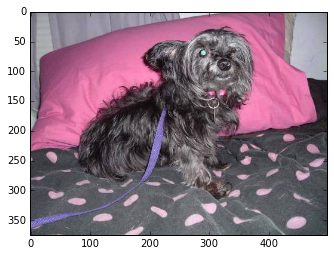

In [823]:
import os
cwd = os.getcwd()
import matplotlib.pyplot as plt
image = plt.imread(cwd + '/data/dogscats/valid/dog/dog.0.jpg')
imgplot = plt.imshow(image)
plt.show()

image_grey = np.zeros((image.shape[0], image.shape[1]))

for row_num in range(len(image)):
    for col_num in range(len(image[row_num])):
        image_grey[row_num][col_num] = np.mean(image[row_num][col_num])
        

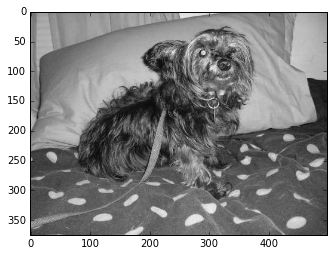

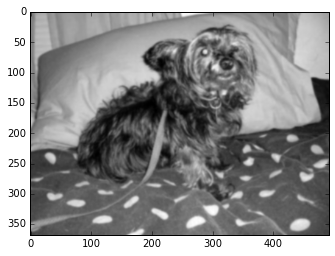

In [824]:
plt.imshow(image_grey, cmap='gray')
plt.show()
f = smooth(image_grey, 3)
imgplot = plt.imshow(f, cmap='gray')
plt.show()

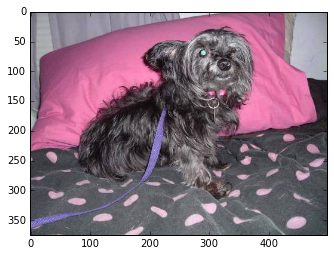

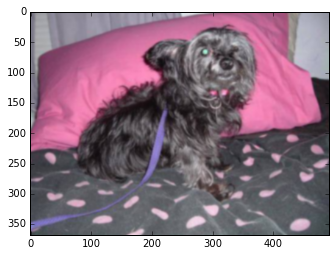

In [825]:
imgplot = plt.imshow(image)
plt.show()
f = smooth(image, 3)
imgplot = plt.imshow(f)
plt.show()